# Soru 1:
Suppose that we would like to know how much families in the US are spending on recreation annually. We estimated the following model:

expenditure=873+0.0012annual_income+0.00002annual_income2−223.57have_kids
 
expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer and save in a Gist.

* Formüle baktığımız zaman sabit değişken=873 birimdir; yani formüldeki dğer katsayıların sonucu 0 çıktığı zaman hedef değişkenin sonucunun
eşit olacağı değerdir.
* Yıllık gelir özelliğinin katsayısı %0.12 çıkmış; yani yıllık gelir 1000 birim artarsa toplam harcamalar 1.2 birim artacaktır bu demek
oluyor ki yıllık gelirin artış/azalışı toplam harcama üzerinde çok küçük bir değişiklik yapmaktadır.
* Yıllık gelir karesinin bir birimlik artış/azalışı toplam harcamalar üzerinde %0.002 değerinde bir etki yaratmaktadır.
* Amerikan ailelerinin çocukları olduğu durumda ise; 1 çocuğa sahip olma toplam harcamalarda 223.57 birimlik artışa sebep olmaktadır.
Çocuk sayısının artması masraf miktarını da arttıracağı formülden de anlaşılmaktadır.

# Soru 2:
In this exercise, you'll work with the historical temperature data from the previous lesson. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the weatherinszeged table from Kaggle.
* Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
* Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
weather=pd.read_csv("weatherHistory.csv")
weather.head()

In [ ]:
# Target variable is the difference betwwen the "temperature" and "apparenttemperature".
weather["temp_diff"]=weather["Temperature (C)"]-weather["Apparent Temperature (C)"]

Y=weather["temp_diff"]
X=weather[["Humidity","Wind Speed (km/h)"]]

lrm=linear_model.LinearRegression()
lrm.fit(X,Y)

In [ ]:
print("Ccoefficients:", lrm.coef_)
print("Bias:", lrm.intercept_)

Formül:
Y = -2.438 + 3.029* x1 + 0.119* x2

In [ ]:
X=smf.add_constant(X)

result=smf.OLS(Y,X).fit()
result.summary()

OLS algoritmasının sonuçlarını yorumlarsak; 
* Sabit değişken -2.4381'dir; yani açıklayıcı değişkenler 0 çıktığı durumda sıcaklığın gerçekleşmesi beklenen sonucudur.
* Humidity katsayısı 3.0292'dir; yani bir birimlik nem artışı, sıcaklık farkında 3.03 oranında artışa neden olacaktır.
* Rüzgar hızının katsayısı da 0.1193'dir; yani rüzgarın artışı, sıcaklık farkında 0.12 oraında artışa neden olacaktır.

Açıklayıcı değişkenlerin hedef değişkeni açıklamada yeterli/anlamlı olup olmadığından emin olmak için OLS sonucundaki ttestinin p değeri yorumlanmalıdır.p değeri 0.05 den ne kadar küçükse, açıklayıcı değişken hedef değişkenin tahmininde o kadar anlamlıdır denir.Tam tersi durumda o açıklayıcı değişken formülden çıkarılabilir. Humidity ve wind speed değişkenlerinin p değerleri 0.000 çıktığı için hedef değişkenimi açıklamada anlamlıdır diyebilirim.

# Soru 3:
In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Kaggle.
Run your house prices model again and interpret the results. Which features are statistically significant and which are not?
Now, exclude the insignificant features from your model. Did anything change?
Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have more prominent effect on the house prices?
Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [2]:
train=pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)

train.isnull().sum()

MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [4]:
# Missing values çok fazla olduğu için direkt silebiliriz.

train.drop("LotFrontage",axis=1,inplace=True)
train.drop("Alley",axis=1,inplace=True)
train.drop("Id",axis=1,inplace=True)
train.drop("FireplaceQu",axis=1,inplace=True)
train.drop("PoolQC",axis=1,inplace=True)
train.drop("Fence",axis=1,inplace=True)
train.drop("MiscFeature",axis=1,inplace=True)

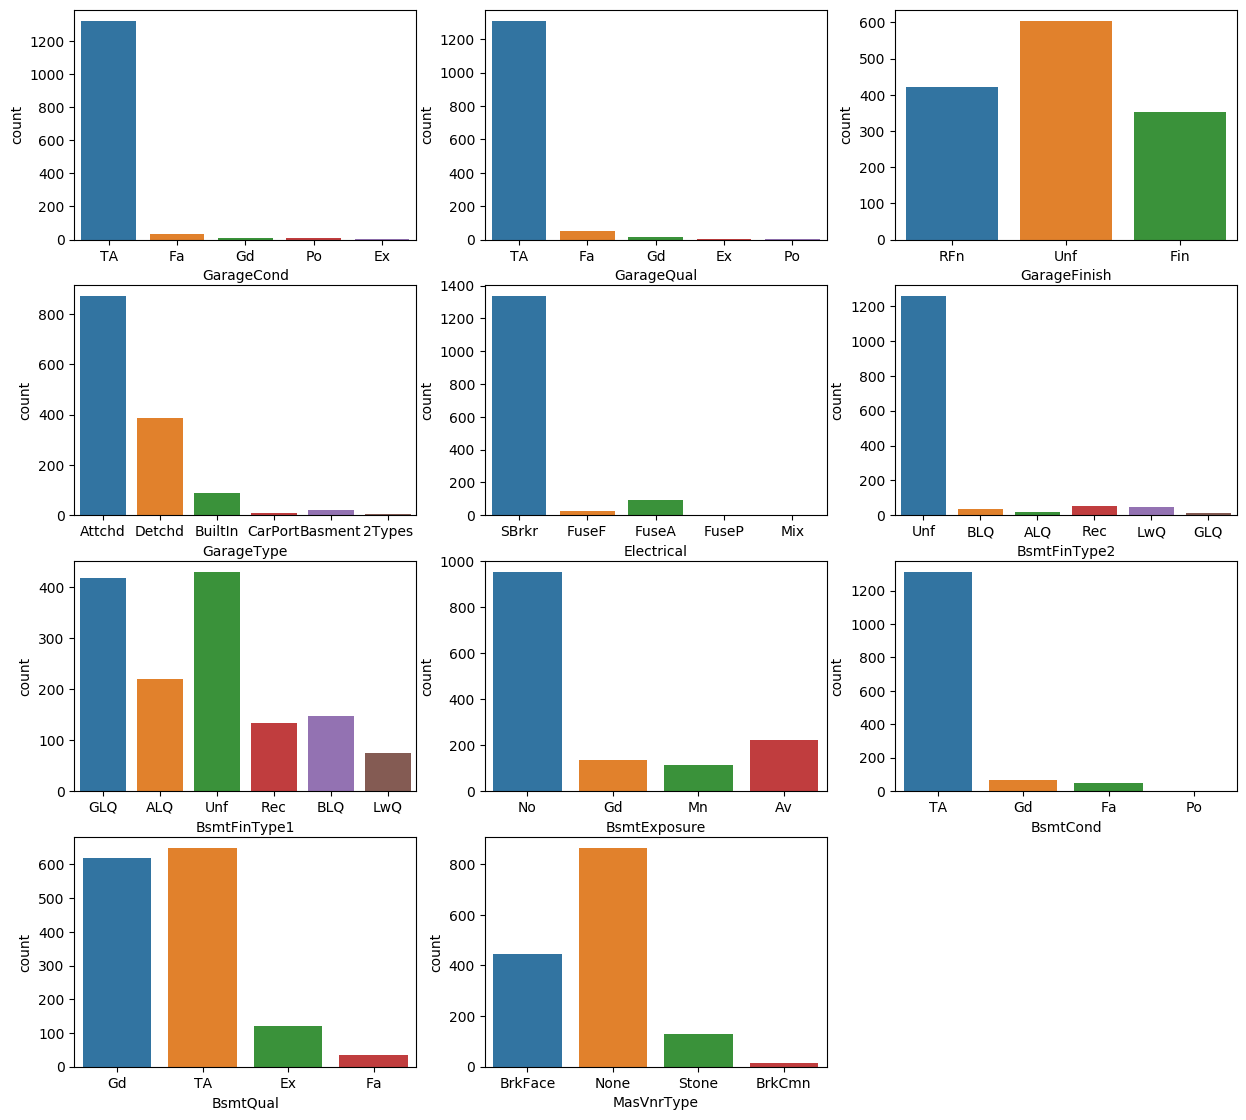

In [5]:
obj_var=["GarageCond", "GarageQual", "GarageFinish", "GarageType","Electrical", "BsmtFinType2",
          "BsmtFinType1","BsmtExposure", "BsmtCond", "BsmtQual","MasVnrType"]

plt.figure(figsize=(15,14),dpi=100)
for i in range(len(obj_var)):
    plt.subplot(4,3,i+1)
    sns.countplot(train[obj_var[i]]);

# Grafikten de gördüğümüz gibi, null değerleri en çok tekrar eden değerlerle doldurmayı düşündüm.

In [7]:
train["GarageCond"].fillna(train["GarageCond"].mode()[0],inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mode()[0],inplace=True)
train["GarageQual"].fillna(train["GarageQual"].mode()[0], inplace=True)
train["GarageFinish"].fillna(train["GarageFinish"].mode()[0], inplace=True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mode()[0], inplace=True)
train["GarageType"].fillna(train["GarageType"].mode()[0], inplace=True)
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)
train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0], inplace=True)
train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0], inplace=True)
train["BsmtQual"].fillna(train["BsmtQual"].mode()[0], inplace=True)
train["BsmtCond"].fillna(train["BsmtCond"].mode()[0], inplace=True)
train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0], inplace=True)
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)


In [8]:
pd.options.display.max_rows
pd.set_option("display.max_columns",None)

num=train.select_dtypes(exclude='O')
num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


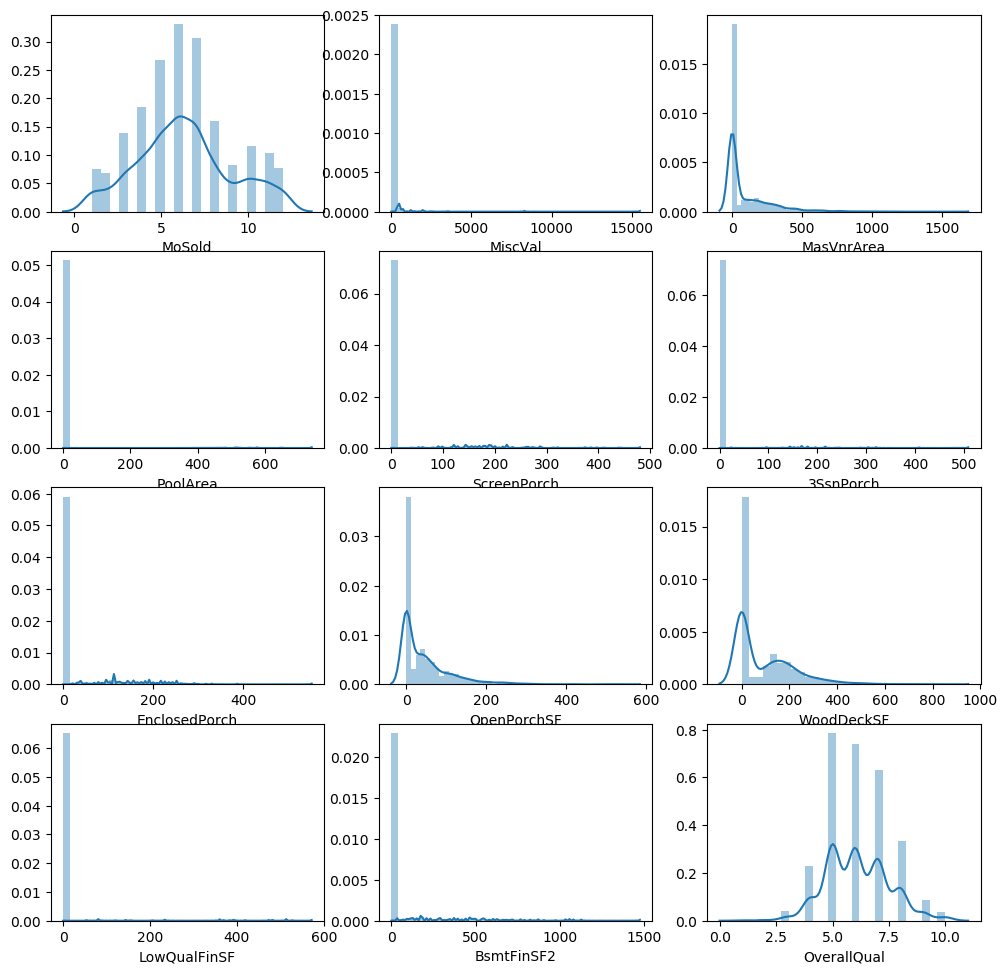

In [9]:
num_var=["MoSold","MiscVal","MasVnrArea","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch","OpenPorchSF","WoodDeckSF",
         "LowQualFinSF","BsmtFinSF2","OverallQual"]

plt.figure(figsize=(12,12),dpi=100)

for i in range(len(num_var)):
    plt.subplot(4,3,i+1)
    sns.distplot(train[num_var[i]]);
    
# Numerik değişkenlerin histogram grafiğinden de görüldüğü gibi en fazla tekrar eden 0 rakamı aslında none değerdir; o yüzden
# bu kolonlardaki o ları none olarak değiştirebiliriz.

In [10]:
train["MiscVal"].replace(0,"none",inplace=True)
train["PoolArea"].replace(0,"none",inplace=True)
train["ScreenPorch"].replace(0,"none",inplace=True)
train["3SsnPorch"].replace(0,"none",inplace=True)
train["EnclosedPorch"].replace(0,"none",inplace=True)
train["OpenPorchSF"].replace(0,"none",inplace=True)
train["WoodDeckSF"].replace(0,"none",inplace=True)
train["LowQualFinSF"].replace(0,"none",inplace=True)
train["BsmtFinSF2"].replace(0,"none",inplace=True)

In [ ]:
# Hedef değişken(Y):  "SalePrice"
#Feature,"PavedDrive","GarageQual","GarageFinish","GarageArea","KitchenQual","GrLivArea","CentralAir"
# "ExterCond","OverallQual", "OverallCond"

#Özellikleri X değişkenine tanımlamadan önce kategorik olanları numerik değişkenlere dönüştürmeliyiz 
# Dönüştürülmüş kolonlar: "PavedDrive_new","GarageQual_new","GarageFinish_new","KitchenQual_new",
# "CentralAir_new", "ExterCond_new"

In [13]:
def paved(PavedDrive):
    if PavedDrive=="Y":
        return 3
    elif PavedDrive=="P":
        return 2
    elif PavedDrive=="N":
        return 1

train["PavedDrive_new"]=train["PavedDrive"].apply(paved)

In [23]:
def garagequal(GarageQual):
    if GarageQual=="Ex":
        return 5
    elif GarageQual=="Gd":
        return 4
    elif GarageQual=="TA":
        return 3
    elif GarageQual=="Fa":
        return 2
    elif GarageQual=="Po":
        return 1
    
train["GarageQual_new"]=train["GarageQual"].apply(garagequal)

In [26]:
def garagefinish(GarageFinish):
    if GarageFinish=="Fin":
        return 3
    elif GarageFinish=="RFn":
        return 2
    elif GarageFinish=="Unf":
        return 1

train["GarageFinish_new"]=train["GarageFinish"].apply(garagefinish)

In [30]:
def kitchenqual(KitchenQual):
    if KitchenQual=="Ex":
        return 4
    elif KitchenQual=="Gd":
        return 3
    elif KitchenQual=="TA":
        return 2
    elif KitchenQual=="Fa":
        return 1

train["KitchenQual_new"]=train["KitchenQual"].apply(kitchenqual)

In [33]:
# dummy değişken oluşturma

train["CentralAir_new"]=train["CentralAir"].replace({"Y":1, "N":0})

In [38]:
def extercon(ExterCond):
    if ExterCond=="Ex":
        return 5
    elif ExterCond=="Gd":
        return 4
    elif ExterCond=="TA":
        return 3
    elif ExterCond=="Fa":
        return 2
    elif ExterCond=="Po":
        return 1
    
train["ExterCond_new"]=train["ExterCond"].apply(extercon)

In [42]:
Y1=train["SalePrice"]
X1=train[["GarageArea","GrLivArea","OverallQual","OverallCond","PavedDrive_new","GarageQual_new",
        "GarageFinish_new","KitchenQual_new","CentralAir_new","ExterCond_new"]]

In [43]:
lrm=linear_model.LinearRegression()
lrm.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print("Coefficient:", lrm.coef_)
print("Bias:", lrm.intercept_)


Coefficient: [   54.88686135    50.56941948 19369.19809456  2146.40285143
  3579.48300454  7034.67649911  9298.5655194  19915.37717733
  5058.61317165 -3717.8078254 ]
Bias: -142700.51819527542


In [46]:
X1=smf.add_constant(X1)
results=smf.OLS(Y1,X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     475.0
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:31:40   Log-Likelihood:                -17483.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1449   BIC:                         3.505e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.427e+05   1.57e+04     -9.102      0.000   -1.73e+05   -1.12e+05
GarageArea          54.8869      6.148      8.927      0.000      42.827      66.947
GrLivArea           50.5694      2.462     20.540      0.000      45.740      55.399
OverallQual       1.937e+04   1198.475     16.162      0.000     1.7e+04    2.17e+04
OverallCond       2146.4029   1028.059      2.088      0.037     129.759    4163.047
PavedDrive_new    3579.4830   2250.931      1.590      0.112    -835.950    7994.916
GarageQual_new    7034.6765   4289.067      1.640      0.101   -1378.769    1.54e+04
GarageFinish_new  9298.5655   1546.158      6.014      0.000    6265.617    1.23e+04
KitchenQual_new   1.992e+04   2125.099      9.372      0.000    1.57e+04    2.41e+04
CentralAir_new    5058.6132   4579.462      1.105      0.270   -3924.471     1.4e+04
ExterCond_new    -3717.8078   3147.163     -1.181      0.238   -9891.291    2455.675
==============================================================================
Omnibus:                      441.243   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21252.426
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                      21.650   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ev satış fiyatlarının tahmin edilmesinde işime yarayacağını düşündüğüm özellikleri X1 değişkenine fit ettim. Bu değişkenlerin hedef değişkenimi açıklamada anlamlı olup olmadığını anlamak için ise OLS algoritmasının sonuçlarını yorumlayalım:

* sabit değişken= -142700.52 çıkmıştır; yani tüm açıklayıcı değişkenler 0 olduğunda ev fiyatının sonucuna eşit olmuş olur.
* GarageArea = 54.88'dir; yani garajın metrekaresindeki 1 birimlik artış ev fiyatlarında 54 birimlik artışa sebep olur.
* GrLivArea	= 50.56'dır; yani evin net metrekaresindeki 1 birimlik artış ev fiyatlarında 50 birimlik artışa sebep olur.
* OverallQual = 1.937e+04'dır; yani ev kalitesindeki artış satış fiyatlarında 1937 birimlik artışa sebep oluyor.
* OverallCond = 2146.4029'dir; yani ev koşullarının iyileşmesi satış fiyatında 2146 birimlik artışa sebep olur.
* PavedDrive_new = 3579.48'dir; yani ev yolunun asfalt kalitesi satış fiyatlarında 3579 birimlik artışa neden olur.
* GarageQual_new = 7034.6'dir yani garajın gittikçe kaliteli olması satış fiyatlarında artışa sebep olur

Son olarak açıklayıcı değişkenlerin hedef değişkeni açıklamada ne kadar anlamlı olduğunu görmek için p değerinin 0.05'den küçük olması koşulunu inceleyelim. Tüm featurelar için p değeri yaklaşık 0 olduğu için bu özellikler anlamlıdır diyebiliriz.